<a href="https://colab.research.google.com/github/amunwes/Elec-400M/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_train = [6.94, 0.19, 5.70, 6.74, 4.49, 2.02, 1.78, 6.84, 1.52, 0.80]
Y_train = [2.0, -0.07, -0.32, 1.17, -1.16, -0.71, -2.74, 2.56, -1.37, -0.49]

X_test =[4.88, 1.28, 3.36, 6.07, 3.98, 3.91, 5.56, 4.62, 5.85, 5.41]
Y_test =[-1.17, -0.01, -2.39, 0.82, -2.18, -2.49, -0.38, -1.97, 1.19, -0.50] 
X_train = np.array([X_train]).transpose()
Y_train = np.array([Y_train]).transpose()





In [ ]:
def AnalSolution(X,Y):
  #analytic solution has 2 conditions 2X^TX >0  and 2X^T(Xtheta - Y) = 0
  # theta = (X^TX)^-1X^TY
  ones = np.ones((X.shape[0],1))
  X = np.concatenate((ones, X),axis = 1)

  theta = np.linalg.inv(X.T@X)@X.T@Y
  
  return theta


(a) Calculate the analytic solution of the linear model :
\begin{equation}
fΘ(x) = θ_{0} + θ_{1}x. 
\end{equation}


Then, use scatter plot to plot the training data points and draw the fitted line on the same figure.


theta :[[-1.65766519]
 [ 0.41725154]] 



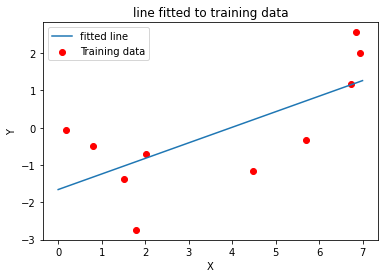

In [ ]:
theta = AnalSolution(X_train, Y_train)
print("theta :{} \n".format(theta))

plt.scatter(X_train, Y_train, c='r', label= 'Training data')
plt.plot(theta[1]*range(0,8)+theta[0], label='fitted line')
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('line fitted to training data') 
plt.legend()
plt.show()

(b) Suppose we want to increase the model complexity, by considering y as a linear function of both x and $x^2$.
Namely 

\begin{equation} 
fΘ(x) = θ_{0} + θ_{1}x + θ_{2}x^{2}
\end{equation}

In this case, calculate the analytic solution of model and plot the smooth curve
of the model, together with the scatter plot of data points in training set.

theta :[[ 0.28514264]
 [-1.48968069]
 [ 0.25172685]] 



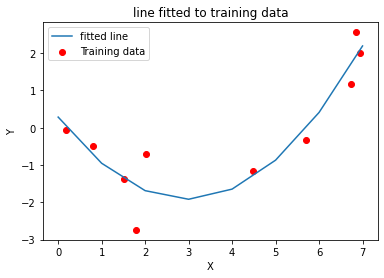

In [ ]:
# print(X_train,"\n",X_train**2, X_train[0], X_train[0]**2)
X_2 = np.concatenate((X_train,X_train**2), axis = 1)
theta = AnalSolution(X_2,Y_train)
print("theta :{} \n".format(theta))

plt.scatter(X_train, Y_train, c='r', label= 'Training data')
plt.plot(theta[0] + theta[1]*range(0,8) + theta[2]*[x**2 for x in range(0,8)], label='fitted line')
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('line fitted to training data') 
plt.legend()
plt.show()

(c) Let us further increase the model complexity by assuming y is related to higher-order forms of x, i.e.,
\begin{equation}
fΘ(x) = θ_{0} + θ_{1}x + Θ_{2}x^{2} + θ_{3}x^{3} + θ_{4}x^{4}
\end{equation}

Again, calculate the analytic solution of the model and plot the
curve of the function, together with the data points in training set.


In [ ]:
def lineGen(theta, power, range=range(0,8)):
  return theta[power]*[x**power for x in range]


theta :[[ 0.51817538]
 [-2.52130644]
 [ 1.07886107]
 [-0.19978244]
 [ 0.01466235]] 



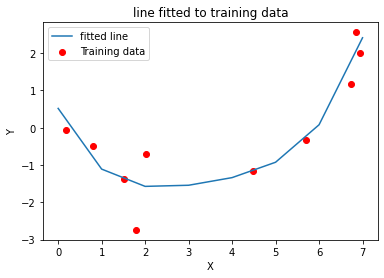

In [ ]:
X_3 = np.concatenate((X_train,X_train**2,X_train**3,X_train**4), axis = 1)
theta = AnalSolution(X_3,Y_train)
print("theta :{} \n".format(theta))

fitline = lineGen(theta,0) + lineGen(theta,1) + lineGen(theta,2) + lineGen(theta,3) + lineGen(theta,4)

plt.scatter(X_train, Y_train, c='r', label= 'Training data')
plt.plot(fitline, label='fitted line')
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('line fitted to training data') 
plt.legend()
plt.show()

(d) Observe the above three functions, point out which could be faced with underfitting, which could be faced
with overfitting, and which one is relatively a good fit? Then, calculate the values of prediction error on the test
data to verify your thoughts.


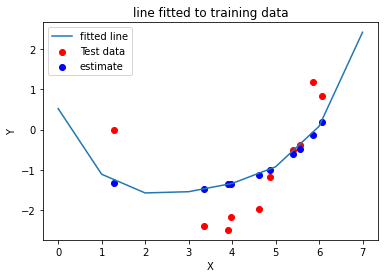

In [ ]:
plt.scatter(X_test, Y_test, c='r', label= 'Test data')
plt.plot(fitline, label='fitted line')
fitline = lineGen(theta,0,X_test) + lineGen(theta,1,X_test) + lineGen(theta,2,X_test) + lineGen(theta,3,X_test) + lineGen(theta,4,X_test)
plt.scatter(X_test, fitline, c = "b", label = "estimate")
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('line fitted to training data') 
plt.legend()
plt.show()

(e) For question (a-c), verify your optimal Θ∗ using the linear regression function in sklearn. The example code
is provided in ELEC 400M HW1 Example Codes.ipynb.
